In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# =====================================================
# PART A: LINEAR REGRESSION
# =====================================================
print("=" * 60)
print("PART A: LINEAR REGRESSION")
print("=" * 60)

# Create synthetic regression data
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

PART A: LINEAR REGRESSION


In [3]:
# Metrics
print("\nRegression Metrics:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Test MSE : {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Train R² : {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²  : {r2_score(y_test, y_test_pred):.4f}")


Regression Metrics:
Train MSE: 228.8446
Test MSE : 240.0475
Train MAE: 12.1294
Test MAE : 12.0117
Train R² : 0.7564
Test R²  : 0.7986


In [4]:
# Coefficients
print("\nModel Coefficients:")
print(f"Intercept (β0): {linear_model.intercept_:.4f}")
print(f"Coefficient (β1): {linear_model.coef_[0]:.4f}")


Model Coefficients:
Intercept (β0): 0.3065
Coefficient (β1): 27.6115


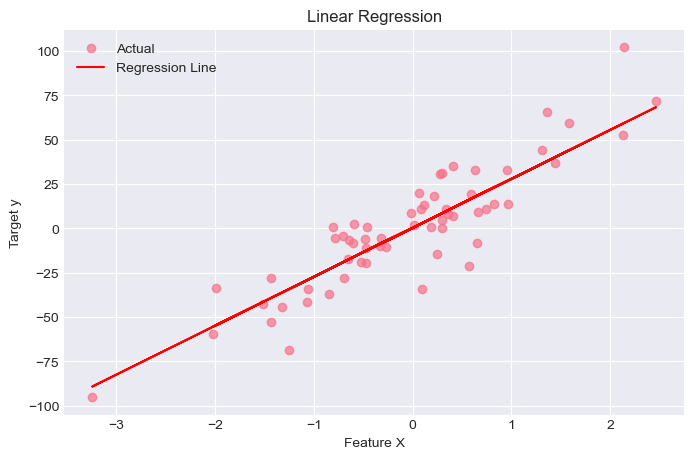

In [5]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Actual", alpha=0.7)
plt.plot(X_test, y_test_pred, color='red', label="Regression Line")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [6]:
# =====================================================
# PART B: LOGISTIC REGRESSION
# =====================================================
print("\n" + "=" * 60)
print("PART B: LOGISTIC REGRESSION")
print("=" * 60)

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



PART B: LOGISTIC REGRESSION


In [7]:
# Train model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_test_pred = logistic_model.predict(X_test_scaled)

# Metrics
print("\nClassification Metrics:")
print(f"Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-score : {f1_score(y_test, y_test_pred):.4f}")


Classification Metrics:
Accuracy : 0.9883
Precision: 0.9907
Recall   : 0.9907
F1-score : 0.9907


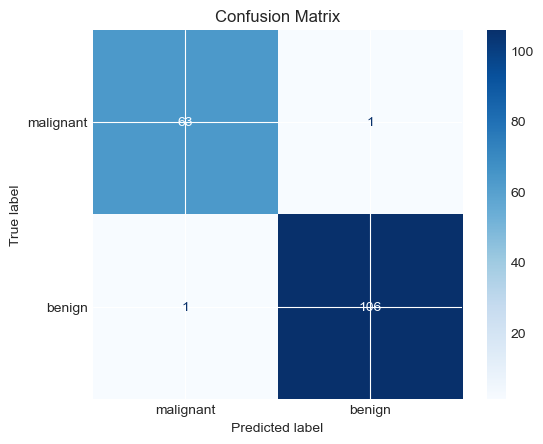


Top 10 Important Features:
                 Feature  Coefficient
21         worst texture    -1.226329
27  worst concave points    -0.996807
23            worst area    -0.954956
20          worst radius    -0.941060
13            area error    -0.937493
10          radius error    -0.886370
28        worst symmetry    -0.869444
26       worst concavity    -0.785989
24      worst smoothness    -0.748971
22       worst perimeter    -0.731042


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": logistic_model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nTop 10 Important Features:")
print(coef_df.head(10))


In [9]:
# =====================================================
# Decision Boundary (Top 2 Features)
# =====================================================
top2 = coef_df.head(2)["Feature"].values
idx1 = list(data.feature_names).index(top2[0])
idx2 = list(data.feature_names).index(top2[1])

X_2d = X[:, [idx1, idx2]]

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y
)

scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)

model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train_2d)

# Meshgrid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

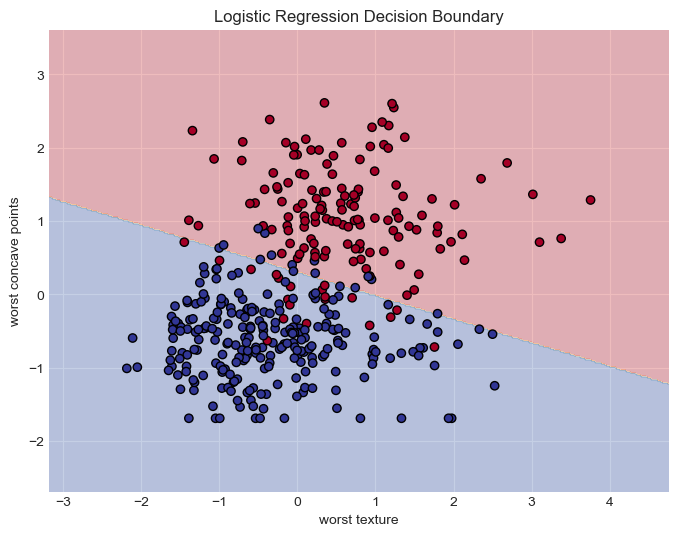


PROGRAM EXECUTED SUCCESSFULLY


In [10]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
            c=y_train_2d, cmap='RdYlBu', edgecolor='k')
plt.xlabel(top2[0])
plt.ylabel(top2[1])
plt.title("Logistic Regression Decision Boundary")
plt.show()

print("\nPROGRAM EXECUTED SUCCESSFULLY")